# 求偏微分

In [11]:
def func(x):
    return x ** 2

In [17]:
## 偏微分函数
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

In [18]:
dfunc(func, 4)

8.00009999998963

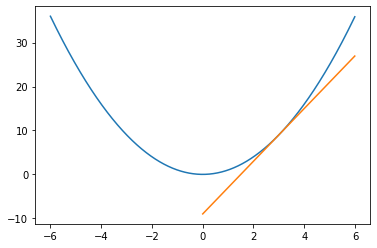

In [21]:
import matplotlib.pyplot as plt
import numpy as np

## 绘制 x ^ 2
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

## 切线函数
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y

## 绘制 x = 3 时的切线
x2 = np.arange(0, 6, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)

# 中央差分

In [20]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/ (2*h)

In [22]:
dfunc(func, 3)

6.000000000012662

# 计算偏微分通用公式

In [54]:
def dfunc(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags = ['multi_index'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)   # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
    return grad

In [24]:
dfunc(func, np.array(3.0))

array(6.)

# 梯度下降

In [27]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func, x)
        x = x - grad * lr
        res.append(x)
        
    return np.array(res)

def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [29]:
x = gradient_descent(func, -5, lr = 0.8)

array([-5.00000000e+00,  3.00000000e+00, -1.80000000e+00,  1.08000000e+00,
       -6.48000000e-01,  3.88800000e-01, -2.33280000e-01,  1.39968000e-01,
       -8.39808000e-02,  5.03884800e-02, -3.02330880e-02,  1.81398528e-02,
       -1.08839117e-02,  6.53034701e-03, -3.91820820e-03,  2.35092492e-03,
       -1.41055495e-03,  8.46332972e-04, -5.07799783e-04,  3.04679870e-04,
       -1.82807922e-04,  1.09684753e-04, -6.58108519e-05,  3.94865112e-05,
       -2.36919067e-05,  1.42151440e-05, -8.52908641e-06,  5.11745185e-06,
       -3.07047111e-06,  1.84228266e-06, -1.10536960e-06,  6.63221759e-07,
       -3.97933055e-07,  2.38759833e-07, -1.43255900e-07,  8.59535400e-08,
       -5.15721240e-08,  3.09432744e-08, -1.85659646e-08,  1.11395788e-08,
       -6.68374727e-09,  4.01024836e-09, -2.40614902e-09,  1.44368941e-09,
       -8.66213646e-10,  5.19728188e-10, -3.11836913e-10,  1.87102148e-10,
       -1.12261289e-10,  6.73567731e-11, -4.04140639e-11,  2.42484383e-11,
       -1.45490630e-11,  

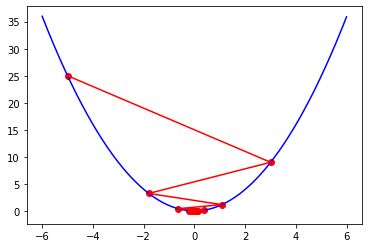

In [39]:
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c = 'b')
plt.plot(x, func(x), c = 'r')
plt.scatter(x, func(x), c = 'r')
plt.show()

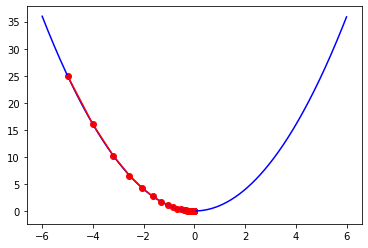

In [43]:
x = gradient_descent(func, -5, lr = 0.1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c = 'b')
plt.plot(x, func(x), c = 'r')
plt.scatter(x, func(x), c = 'r')
plt.show()

# 计算神经网络的梯度

In [45]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_err(y_hat, y):
    delta = 1e-4
    return -np.sum(y * np.log(y_hat + delta))

# 初始化神经网络
x = np.array([0.6, 0.9])

np.random.seed(42)
weight = np.random.randn(2, 3)
z = np.dot(x, weight)

# 取得预测值 y_hat
y_hat = softmax_function(z)

# 计算代价（损失）
y = np.array([0, 0, 1])
cross_entropy_err(y_hat, y)

1.8019198212355374

# 计算偏微分用公式

In [58]:
def dfunc(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags = ['multi_index'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)   # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
    return grad

In [59]:
def predict(x):
    return np.dot(x, weight)

def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss

func = lambda w: loss(x, y)
dfunc(func, weight)

array([[ 0.43907169,  0.06169548, -0.50076718],
       [ 0.65860754,  0.09254323, -0.75115077]])